<a href="https://colab.research.google.com/github/AlejandroVasquez3/DDDS-My-Projects/blob/main/Project-4/Spotify_Description_for_Students_REV001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


## Resources:
- [2b module 4](https://colab.research.google.com/drive/125VEwiXdJWJx7uMzjnNlkLZShun7-SkC#scrollTo=Pra-X3Fvb02X)
- [2d module 4](https://colab.research.google.com/drive/1Jfrr_T0zQzFeG8mB2jwahZdG5BFIoDXb#scrollTo=xrDiMV-OlTSB)

This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song. It might help to imagine that the song will not be released for several weeks.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



## Problem Definition
This is a Supervised Learning Problem, with our target being to predict the "Popularity" of a song before it is released. This is a regression problem, and we will use Decision Tree Regression and Random Forest Regression. We want to minimize the cross-validated root mean squared error(RMSE)

### Import Needed Libraries

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

import graphviz
from IPython.display import display
from sklearn import tree

## Data Collection/Sources

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: Ga67PhVnxHCLhF5SdIcL9PaiB3DetOWkb93zuEUuf975auQD7PPcz0vbgA6X2CfuV6eebRonQyM=
x-amz-request-id: BDEZFT72EZ9ZH5D7
Date: Wed, 02 Jul 2025 14:22:01 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [3]:
!curl -s -O {url}

In [4]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  2 14:22 ./
drwxr-xr-x 1 root root   4096 Jul  2 14:17 ../
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config/
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data/
-rw-r--r-- 1 root root 738124 Jul  2 14:22 Spotify.csv


In [5]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
spotify_data = pd.read_csv(url)
spotify_data.head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A


In [8]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [9]:
# Back-up of Data
spotify_data_backup = spotify_data.copy()

### Inital Toughts on Data
- Features we would only know before the song is released publicly
  - Song Name
  - Artist
  - Arisit Followers
  - Song ID
  - Genre
  - Release Date? May omit this
  - Duration (ms)?

- Target
  - Popularity

## Data Cleaning

### Feature Selection

In [10]:
# Make dataframe of Desired Features and target
spotify_df = spotify_data[["Song Name", "Artist", "Artist Followers", "Genre", "Release Date", "Duration (ms)", "Popularity"]]
spotify_df.head(3)

,Song Name,Artist,Artist Followers,Genre,Release Date,Duration (ms),Popularity
0,Beggin',Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,211560,100
1,STAY (with Justin Bieber),The Kid LAROI,2230022,['australian hip hop'],2021-07-09,141806,99
2,good 4 u,Olivia Rodrigo,6266514,['pop'],2021-05-21,178147,99


In [30]:
# TEST Make dataframe of Desired Features and target
spotify_df = spotify_data[["Artist Followers", "Duration (ms)", "Popularity"]]
spotify_df.head(3)

,Artist Followers,Duration (ms),Popularity
0,3377762,211560,100
1,2230022,141806,99
2,6266514,178147,99


In [31]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist Followers  1556 non-null   object
 1   Duration (ms)     1556 non-null   object
 2   Popularity        1556 non-null   object
dtypes: object(3)
memory usage: 36.6+ KB


In [35]:
spotify_df["Duration (ms)"] = pd.to_numeric(spotify_df["Duration (ms)"], errors="coerce")
spotify_df["Duration (ms)"] = spotify_df["Duration (ms)"].fillna(0).astype("Int64")
spotify_df.head(3)

/tmp/ipython-input-35-4070574678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["Duration (ms)"] = pd.to_numeric(spotify_df["Duration (ms)"], errors="coerce")
/tmp/ipython-input-35-4070574678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["Duration (ms)"] = spotify_df["Duration (ms)"].fillna(0).astype("Int64")


,Artist Followers,Duration (ms),Popularity
0,3377762,211560,100
1,2230022,141806,99
2,6266514,178147,99


In [38]:
col_list = spotify_df.columns.to_list()

In [63]:
# Changing Dtype of Dataframe

for col in col_list:
  spotify_df[col] = pd.to_numeric(spotify_df[col], errors="coerce")
  spotify_df[col] = spotify_df[col].fillna(0).astype("Int64")
spotify_df = spotify_df[(spotify_df != 0).all(axis=1)]

/tmp/ipython-input-63-3911946092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df[col] = pd.to_numeric(spotify_df[col], errors="coerce")
/tmp/ipython-input-63-3911946092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df[col] = spotify_df[col].fillna(0).astype("Int64")


In [64]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1555
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Artist Followers  1509 non-null   Int64
 1   Duration (ms)     1509 non-null   Int64
 2   Popularity        1509 non-null   Int64
dtypes: Int64(3)
memory usage: 51.6 KB


In [65]:
for col in spotify_df.select_dtypes(include='object').columns:
    # Find values that are not purely numeric after stripping whitespace
    non_numeric_values = spotify_df[col][spotify_df[col].astype(str).str.strip().str.fullmatch(r'-?\d+(\.\d+)?').fillna(False) == False]
    if not non_numeric_values.empty:
        print(f"Column '{col}' contains non-numeric or problematic values:\n{non_numeric_values.unique()}")

        # You can also check for just whitespace strings specifically
        whitespace_values = spotify_df[col][spotify_df[col].astype(str).str.fullmatch(r'\s+')]
        if not whitespace_values.empty:
             print(f"Column '{col}' specifically contains whitespace strings:\n{whitespace_values.unique()}")

Is song name important? since we have Song ID

## Exploratory Data Analysis


In [93]:
corr_sam = spotify_df.corr()
corr_sam

,Artist Followers,Duration (ms),Popularity
Artist Followers,1.000000,0.139131,0.026226
Duration (ms),0.139131,1.000000,0.073679
Popularity,0.026226,0.073679,1.000000


## Processing

In [66]:
# Our Data to Test/Train
X = spotify_df.drop('Popularity', axis = 1)
y = spotify_df['Popularity']

### Decision Tree Reggression

In [67]:
# Quick Run
numLoops = 500

mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=4, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')

RMSE: 11356.37650947549
RMSE_std: 829.3601610873679


#### Choosing Tree Depth

In [68]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


In [69]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,11.699299,0.865970
1,2,11.679427,0.827898
2,3,11.532104,0.816249
3,4,11.436937,0.832859
4,5,11.326808,0.803683
5,6,11.343306,0.823413
6,7,11.523873,0.827264
7,8,11.741363,0.848238
8,9,11.947458,0.898053
9,10,12.104921,0.911498


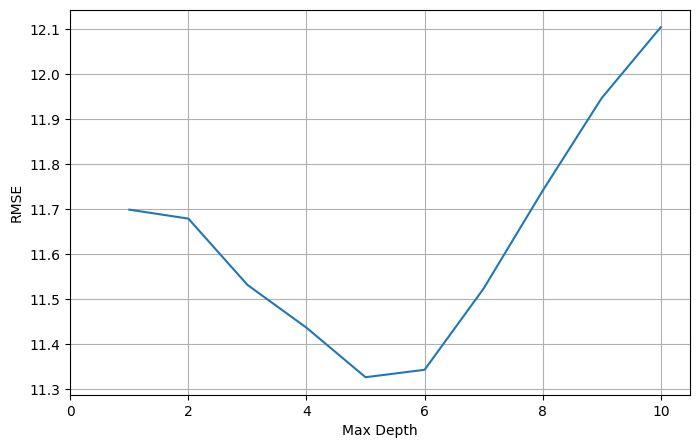

In [70]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [84]:
# Choose best Max Depth and Re-run
# Re run with max depth = 4
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=5 ) # Enter Max Depth choice here
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")


CV RMSE: 11350.0


##### Visualize the Decision Tree

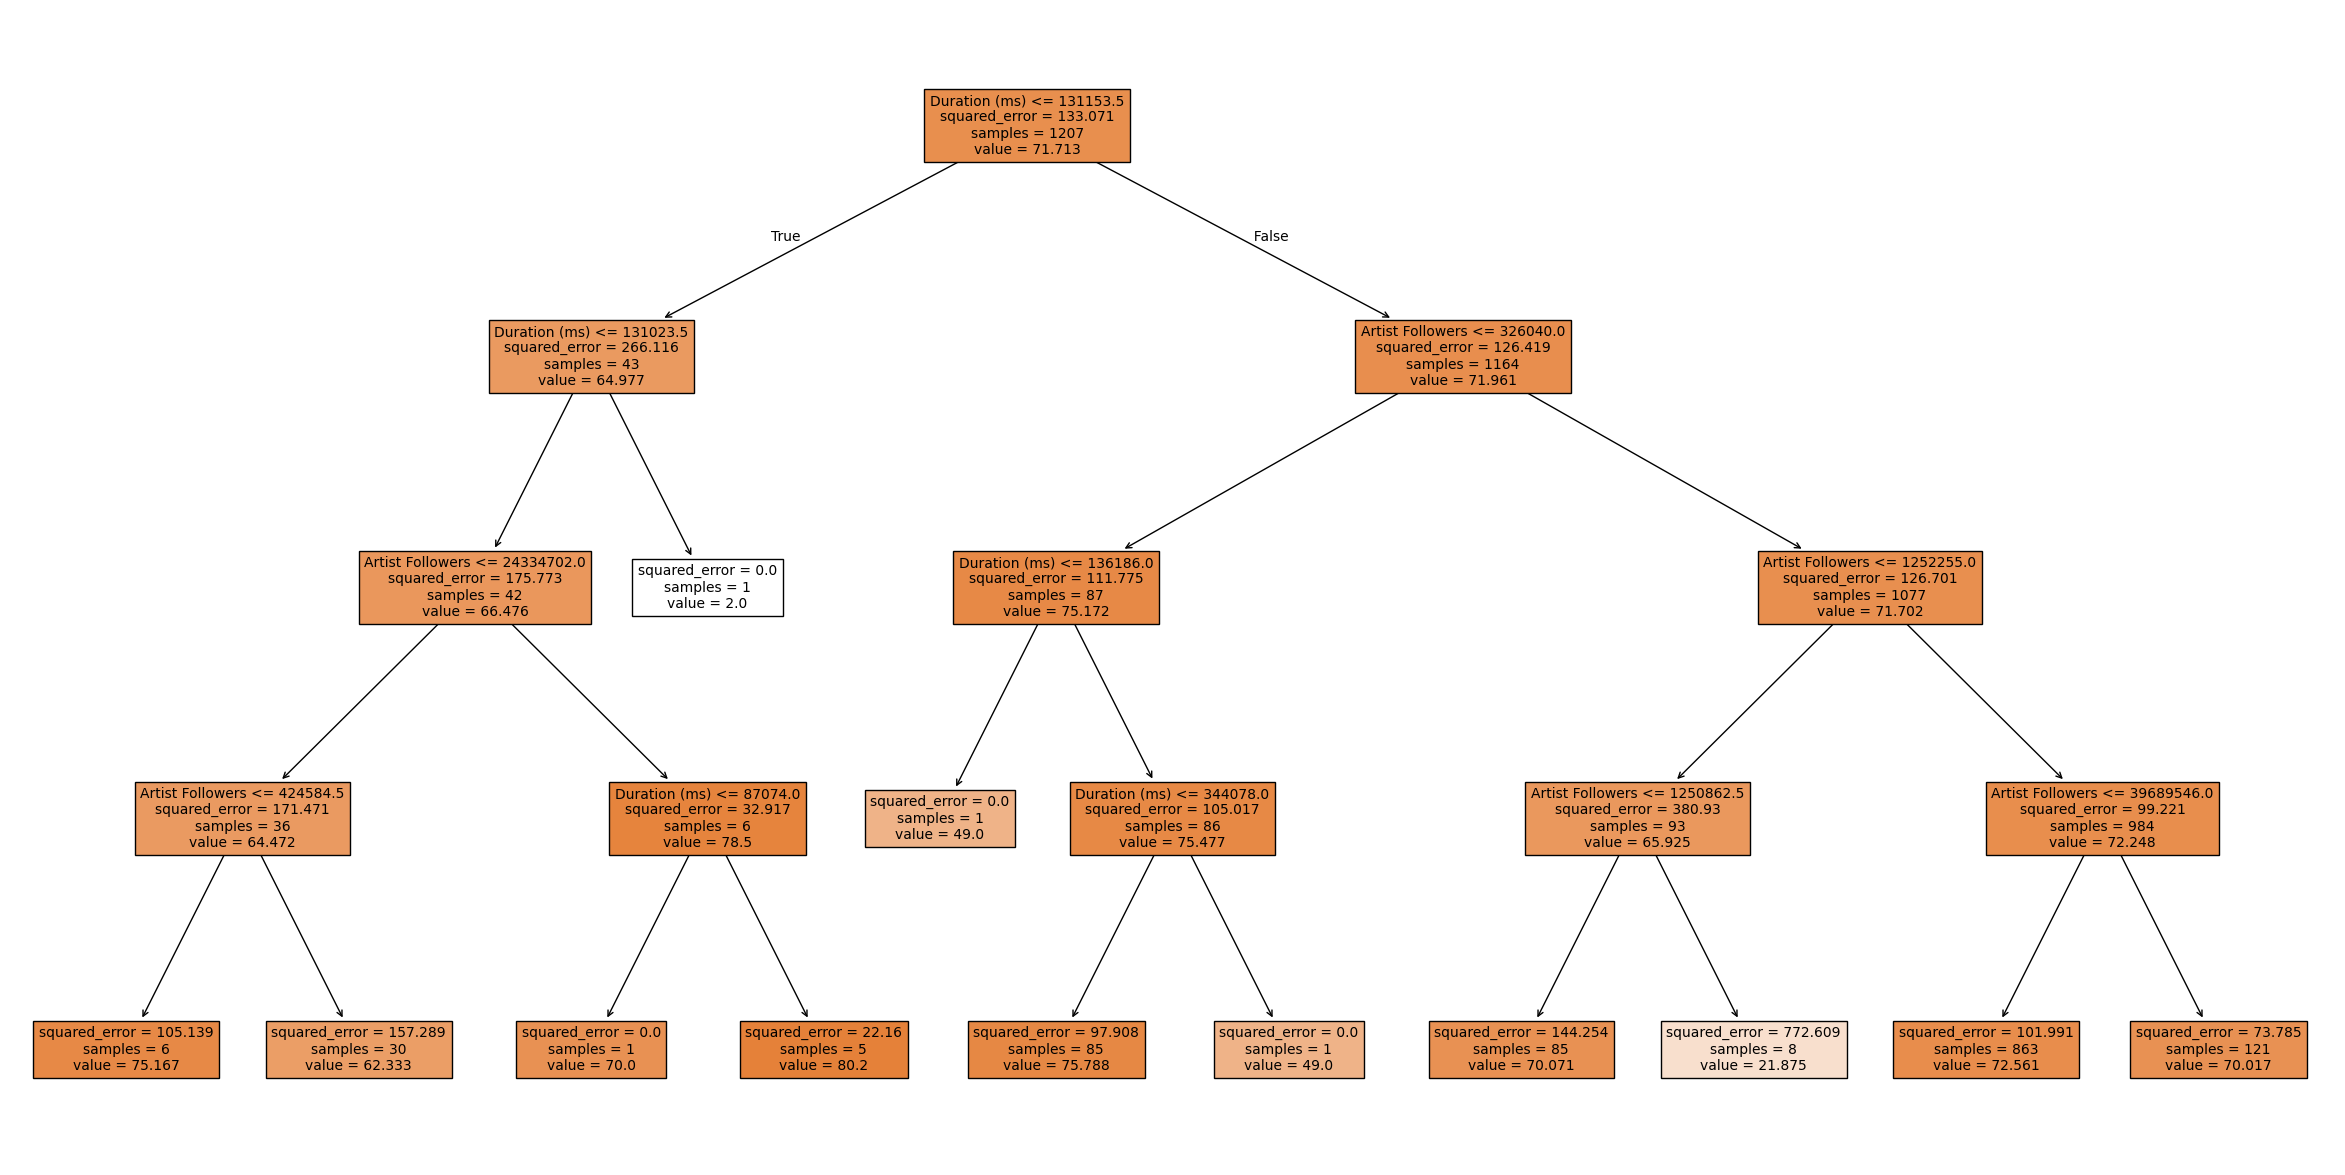

In [72]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)


### Random Forest

In [73]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')
np.sqrt(mean_error)[:50]


RMSE: 11100.178364958236
RMSE_std: 680.917486378041


array([10.92822014, 11.44412284, 11.2483586 , 10.08204644, 11.24671733,
       11.10860594, 10.0753851 , 11.51782316, 10.68769175, 11.74132464,
       12.24052276, 11.83180583, 11.19412097, 10.90302697, 10.9433838 ,
       10.10701178, 11.13886906, 10.85217194,  9.85167524, 11.27728773,
       10.80243421, 11.12638422, 12.07793881, 10.72100767, 10.49091509,
       10.74220031, 10.28883712, 11.74906365, 11.29602872, 11.17239928,
       11.46008333, 11.15958591,  9.96887042, 11.66956334, 11.5682918 ,
       11.7138293 , 11.73683425, 13.01626466, 10.57231565, 11.87626579,
       10.65948145, 11.23771662, 11.37899191, 11.21380056, 11.51154303,
       11.80848976, 10.27077164, 12.84061005, 10.73660185, 10.19969418])

#### Choosing Number of Trees

In [74]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()


10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [75]:
pickle.dump(rfModel, open('rfModel.p','wb'))


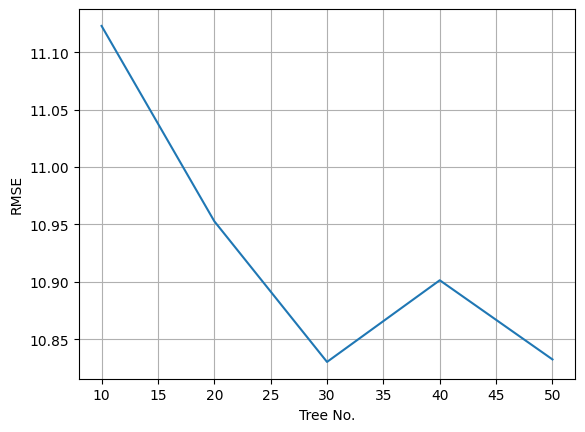

In [76]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [77]:
pd.DataFrame( zip( rmse_results, std_results, ) )

,0,1
0,11.122853,0.631760
1,10.952780,0.665536
2,10.830254,0.634699
3,10.901370,0.555550
4,10.832424,0.575974


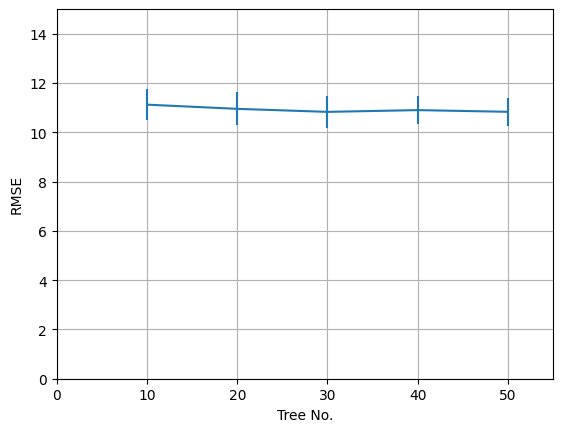

In [90]:
# plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,15)
plt.xlim(0,55)
plt.grid()

In [79]:
print(f'RMSE with 30 trees: {rmse_results[2]*1000}')

RMSE with 30 trees: 10830.25405316523


In [80]:
len(rfModel.estimators_)

50

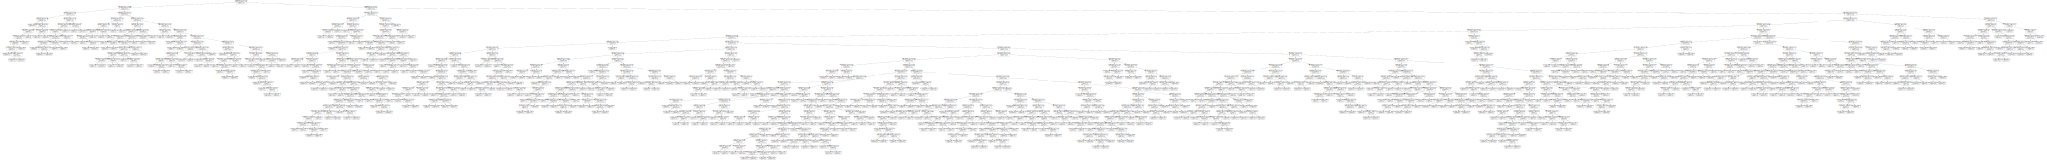

In [81]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)


#### Find Important Predictors

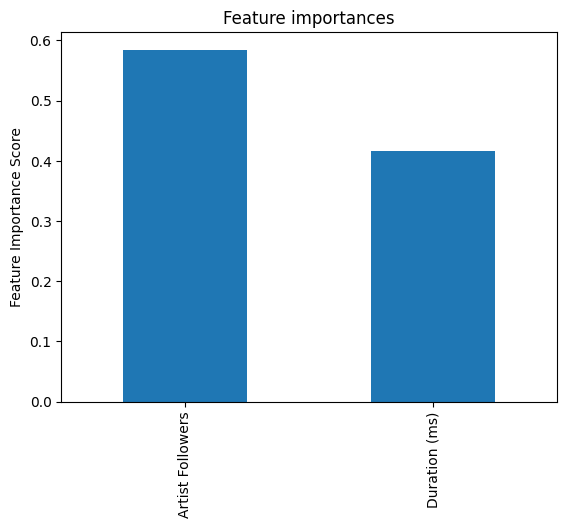

In [82]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;


In [83]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()


,0
Artist Followers,58.444448
Duration (ms),100.000000


## Data Visualization/Communication of Results